In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_csv('RAW_AF7 RAW_AF8 pestaneos 5 segundos.csv')
datatest = pd.read_csv('RAW_AF7 RAW_AF8 pestaneos test.csv')


#Separa X e Y del dataset
X = data.iloc[:, 1:3].values
Y = np.zeros(len(data))
X_test = datatest.values
Y_test = np.zeros(len(datatest))



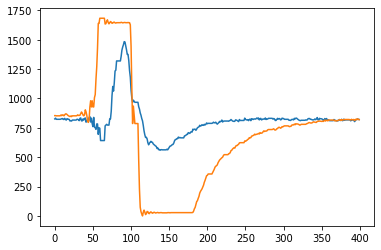

In [3]:
plt.plot(X[1500:1900])


In [4]:
# METODO 1 DE ASIGNACION DE Y=1 A PARTIR DE ANALISIS VISUAL

for i in range(len(data)):
    if ((i>=1550 and  i<=1800) or (i>=2950 and i<=3050) or (i>=4230 and i<=4360)or (i>=5600 and i<=5730)
    or (i>=6940 and i<=7100)or (i>=8300 and i<=8460)or (i>=9700 and i<=9850)or (i>=11000 and i<=11100)
    or (i>=12480 and i<=12680)or (i>=13700 and i<=13800)or (i>=15020 and i<=15140)or (i>=16400 and i<=16600)):
        Y[i]=1

        
for i in range(len(datatest)):
    if ((i>=240 and  i<=300) or (i>=770 and i<=860) or (i>=1280 and i<=1400)or (i>=2230 and i<=2350)
    or (i>=2400 and i<=2550)or (i>=2600 and i<=2750)or (i>=3400 and i<=3500)):
        Y_test[i]=1
   

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (X.shape[1], )))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'MLP.weights.best.hdf5', verbose = 1, save_best_only = True)
hist = model.fit(X, Y, epochs = 50, validation_split = 0.1, callbacks = [checkpointer], verbose = 2, shuffle = True)




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               1536      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               1536      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Train on 15012 samples, validate on 1668 samples
Epoch 1/50
 - 1s - loss

In [8]:
from sklearn import metrics

score = model.evaluate(X_test, Y_test, verbose=1)

predict= [1 if a>0.5 else 0 for a in model.predict(X_test)]

print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(Y_test, predict), metrics.precision_score(Y_test, predict),metrics.recall_score(Y_test, predict),metrics.f1_score(Y_test, predict)))


4047/4047 [==============================] - 0s 13us/step
Accuracy = 0.8623671855695577
Precision = 0.9316546762589928
Recall = 0.32496863237139273
F1 Score = 0.48186046511627906


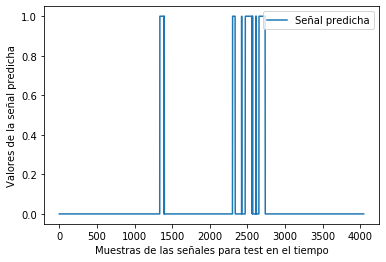

In [9]:
plt.figure()
[pred] = plt.plot(predict)

plt.legend([pred], ["Señal predicha"], loc=1)
plt.xlabel("Muestras de las señales para test en el tiempo")
plt.ylabel("Valores de la señal predicha")
plt.show()

In [10]:
data = pd.read_csv('RAW_AF7 RAW_AF8 pestaneos 5 segundos.csv')
datatest = pd.read_csv('RAW_AF7 RAW_AF8 pestaneos test.csv')


#Separa X e Y del dataset
X = data.iloc[:, 1:3].values
Y = np.zeros(len(data))
X_test = datatest.values
Y_test = np.zeros(len(datatest))


In [11]:
# METODO 2 DE ASIGNACION DE Y=1 A PARTIR DE ANALISIS ESTADISTICO
for i in range (1,len(X)):
    if np.mean(X)*1.15<np.mean(X[i]):
        Y[i]=1
    if np.mean(X)*0.85>np.mean(X[i]):
        Y[i]=1

for i in range (1,len(X_test)):
    if np.mean(X_test)*1.15<np.mean(X_test[i]):
        Y_test[i]=1
    if np.mean(X_test)*0.85>np.mean(X_test[i]):
        Y_test[i]=1
    

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


scaler.fit(X)
X = scaler.transform(X)


scaler.fit(X_test)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(1024, activation = 'relu', input_shape = (X.shape[1], )))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()



model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'MLP.weights.best.hdf5', verbose = 1, save_best_only = True)
hist = model.fit(X, Y, epochs = 50, validation_split = 0.1, callbacks = [checkpointer], verbose = 2, shuffle = True)




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              3072      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1025      
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              3072      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1025      
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________
Train on 15012 samples, validate on 1668 samples
Epoch 1/50
 - 1s - loss


Epoch 00047: val_loss did not improve from 0.00664
Epoch 48/50
 - 0s - loss: 0.0038 - acc: 0.9984 - val_loss: 0.0138 - val_acc: 0.9958

Epoch 00048: val_loss did not improve from 0.00664
Epoch 49/50
 - 0s - loss: 0.0039 - acc: 0.9982 - val_loss: 0.0124 - val_acc: 0.9940

Epoch 00049: val_loss did not improve from 0.00664
Epoch 50/50
 - 0s - loss: 0.0042 - acc: 0.9983 - val_loss: 0.0071 - val_acc: 0.9988

Epoch 00050: val_loss did not improve from 0.00664


In [13]:
from sklearn import metrics

score = model.evaluate(X_test, Y_test, verbose=1)

predict= [1 if a>0.5 else 0 for a in model.predict(X_test)]

print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(Y_test, predict), metrics.precision_score(Y_test, predict),metrics.recall_score(Y_test, predict),metrics.f1_score(Y_test, predict)))


4047/4047 [==============================] - 0s 17us/step
Accuracy = 0.9135161848282679
Precision = 0.4347048300536673
Recall = 0.8772563176895307
F1 Score = 0.5813397129186603


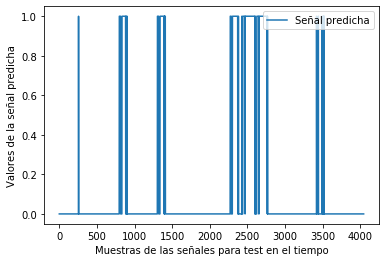

In [14]:
plt.figure()
[pred] = plt.plot(predict)

plt.legend([pred], ["Señal predicha"], loc=1)
plt.xlabel("Muestras de las señales para test en el tiempo")
plt.ylabel("Valores de la señal predicha")
plt.show()